# 10_데이터 구조 변경
### 1. 와이드 포맷과 롱 포맷
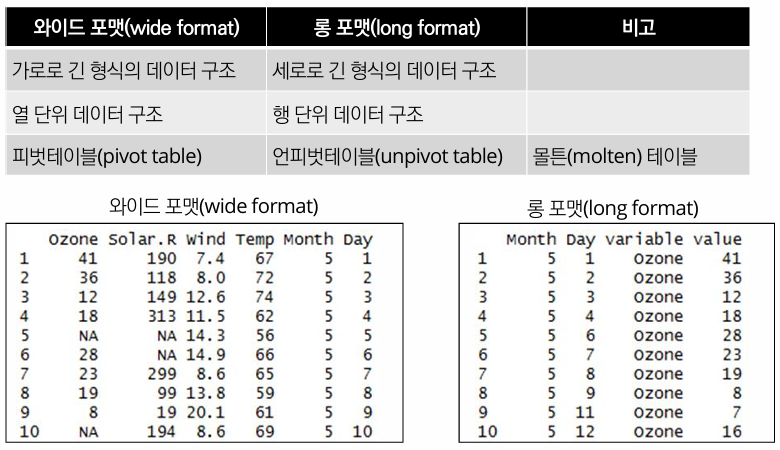

### 2. 샘플 데이터
- 1973년 5월에서 9월까지 뉴욕 대기질을 측정한 데이터셋

In [1]:
import statsmodels.api as sm

In [2]:
airquality_data = sm.datasets.get_rdataset('airquality')

In [3]:
airquality = airquality_data.data

In [4]:
airquality.head()

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5


### 3. melt()를 이용한 언피벗팅
- **melt()** : 와이드 포맷 데이터를 롱 포맷 데이터로 데이터 구조를 바꿈
        DataFrame.melt(id_vars=None, value_vars=None, var_name=None,  
        value_name='value', col_level=None, ignore_index=True)
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.melt.html
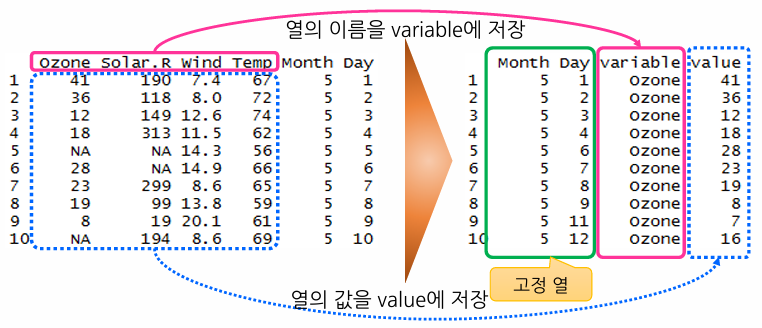

In [5]:
import pandas as pd

In [6]:
pd.melt(airquality, id_vars=['Month','Day'],
        value_vars=['Ozone','Solar.R','Wind','Temp'])

,Month,Day,variable,value
0,5,1,Ozone,41.0
1,5,2,Ozone,36.0
2,5,3,Ozone,12.0
3,5,4,Ozone,18.0
4,5,5,Ozone,NaN
...,...,...,...,...
607,9,26,Temp,70.0
608,9,27,Temp,77.0
609,9,28,Temp,75.0
610,9,29,Temp,76.0


In [7]:
pd.melt(airquality, id_vars=['Month','Day'])

,Month,Day,variable,value
0,5,1,Ozone,41.0
1,5,2,Ozone,36.0
2,5,3,Ozone,12.0
3,5,4,Ozone,18.0
4,5,5,Ozone,NaN
...,...,...,...,...
607,9,26,Temp,70.0
608,9,27,Temp,77.0
609,9,28,Temp,75.0
610,9,29,Temp,76.0


In [8]:
airquality.melt(id_vars=['Month','Day'])

,Month,Day,variable,value
0,5,1,Ozone,41.0
1,5,2,Ozone,36.0
2,5,3,Ozone,12.0
3,5,4,Ozone,18.0
4,5,5,Ozone,NaN
...,...,...,...,...
607,9,26,Temp,70.0
608,9,27,Temp,77.0
609,9,28,Temp,75.0
610,9,29,Temp,76.0


### 4. pivot_table()을 이용한 피벗팅
-  **pivot_table()** 함수는 피벗테이블을 만들어 줌
        DataFrame.pivot_table(values=None, index=None, columns=None,
        aggfunc='mean', fill_value=None, margins=False, dropna=True,
        margins_name='All', observed=<no_default>, sort=True)
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pivot_table.html
    - index : 고정할 열 지정  
    - columns : 열의 이름으로 만들어져야 할 값을 갖는 열  
    - values : columns에서 지정한 열이 만들어지고, 그 열에 들어가야 할 값을 갖는 열을 지정  
    - aggfunc : 집계할 함수

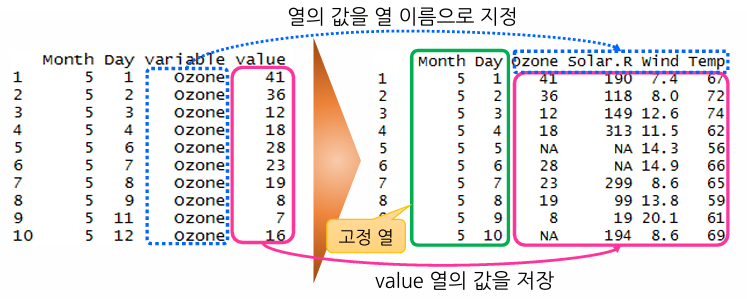

In [9]:
airquality_melted = airquality.melt(id_vars=['Month','Day'])

In [10]:
airquality_melted.pivot_table(index=['Month', 'Day'],
                                            columns=['variable'],
                                            values=['value'])

value                    
variable  Ozone Solar.R  Temp  Wind
Month Day                          
5     1    41.0   190.0  67.0   7.4
      2    36.0   118.0  72.0   8.0
      3    12.0   149.0  74.0  12.6
      4    18.0   313.0  62.0  11.5
      5     NaN     NaN  56.0  14.3
...         ...     ...   ...   ...
9     26   30.0   193.0  70.0   6.9
      27    NaN   145.0  77.0  13.2
      28   14.0   191.0  75.0  14.3
      29   18.0   131.0  76.0   8.0
      30   20.0   223.0  68.0  11.5

[153 rows x 4 columns]

In [11]:
airquality2 = airquality_melted.pivot_table(index=['Month', 'Day'],
                                            columns=['variable'],
                                            values=['value'])

In [12]:
airquality2.head()

value                    
variable  Ozone Solar.R  Temp  Wind
Month Day                          
5     1    41.0   190.0  67.0   7.4
      2    36.0   118.0  72.0   8.0
      3    12.0   149.0  74.0  12.6
      4    18.0   313.0  62.0  11.5
      5     NaN     NaN  56.0  14.3

- 결과 데이터프레임에서 인덱스를 제거하고 출력


In [13]:
airquality2.reset_index(level=['Month','Day'],  # 인덱스 초기화, 기존에 있던 인덱스가 새로운 열로 추가됨
                        col_level=1)

value                    
variable Month Day Ozone Solar.R  Temp  Wind
0            5   1  41.0   190.0  67.0   7.4
1            5   2  36.0   118.0  72.0   8.0
2            5   3  12.0   149.0  74.0  12.6
3            5   4  18.0   313.0  62.0  11.5
4            5   5   NaN     NaN  56.0  14.3
..         ...  ..   ...     ...   ...   ...
148          9  26  30.0   193.0  70.0   6.9
149          9  27   NaN   145.0  77.0  13.2
150          9  28  14.0   191.0  75.0  14.3
151          9  29  18.0   131.0  76.0   8.0
152          9  30  20.0   223.0  68.0  11.5

[153 rows x 6 columns]

In [14]:
airquality2 = airquality2.reset_index(level=['Month','Day'],
                        col_level=1)

In [15]:
airquality2.head()

value                    
variable Month Day Ozone Solar.R  Temp  Wind
0            5   1  41.0   190.0  67.0   7.4
1            5   2  36.0   118.0  72.0   8.0
2            5   3  12.0   149.0  74.0  12.6
3            5   4  18.0   313.0  62.0  11.5
4            5   5   NaN     NaN  56.0  14.3

In [16]:
airquality2.columns.droplevel(level=0)

Index(['Month', 'Day', 'Ozone', 'Solar.R', 'Temp', 'Wind'], dtype='object', name='variable')

In [17]:
airquality2.columns = airquality2.columns.droplevel(level=0)

In [18]:
airquality2.head()

variable,Month,Day,Ozone,Solar.R,Temp,Wind
0,5,1,41.0,190.0,67.0,7.4
1,5,2,36.0,118.0,72.0,8.0
2,5,3,12.0,149.0,74.0,12.6
3,5,4,18.0,313.0,62.0,11.5
4,5,5,NaN,NaN,56.0,14.3
